# Lab 2 
## 95-791 Data Mining (Fall 2021) 
### Name:  Xi Yan
#### Date: Friday, October 29th, 2021

### Topics covered in this Lab:
- Linear and Polynomial Regression with scikit-learn
- Ridge and Lasso Regression
- Cross Validation


### Changing the author field and file name.

 (a) Change the `name:` field on the Rmd document from Your Name Here to your own name.

 (b) Rename this file to "Lab2_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.datasets import load_diabetes
%matplotlib inline
plt.style.use('seaborn-white')

### 1. Data Processing

> For Lab you might want to have your lecture slides and the ISRL textbook (An Introduction to Statistical Learning) open (Chapters 3, 4, and 6) as you go through the exercises. 


In today's Lab we are going to switch from using statsmodels to [scikitlearn](https://scikit-learn.org/stable/). Scikit-learn works with vectors rather than formulas to compute our models. Follow along the next exercises to learn more.


**1)a) Begin by loading the dataset provided into a dataframe called `kc_housing`. Print the first 5 rows of the dataset.**


In [162]:
#you code here
kc_housing = pd.read_csv('kc_house_data.csv')
print(kc_housing.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

**1)b) Verify if there are any missing values. If they are deal with them appropriately. Additionally, drop any columns that might not be relevant to a regression model.**

In [163]:
#you code here
kc_housing.info()
kc_housing.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [164]:
#you code here
kc_housing = kc_housing.dropna()

In [165]:
kc_housing = kc_housing.drop(['id'], axis=1)
kc_housing = kc_housing.drop(['date'], axis=1)

**1)c) We will use `price` as our target variable. Graph the predictor `sqft_living` against the target variable. Use regplot() for this and describe the relationship between those two variables.**

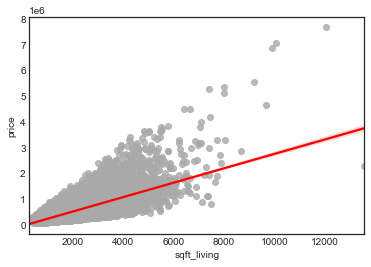

In [166]:
#you code here
sns.regplot(data=kc_housing, x='sqft_living', y='price', scatter_kws={"color": "darkgrey"}, line_kws={"color": "red"})
plt.show()

--> Your answer here
The correlation between sqftliving and price is positive.

**1)d) Split your dataframe into `X` and `y` dataframe. Print your taget variable.**


In [167]:
#you code here
x = kc_housing.drop(['price'], axis=1)
y = kc_housing['price']

**1)d) During the lectures we talked about spliting our dataset into training and testing so that we can validate our models. One easy way of doing this is using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn. Split your `X` and `y` from the kc_housing dataset into `X_train`, `X_test`, `y_train` and `y_test`. Use a 75-25 ratio for the split and a random_state=1. Print out your y_test.**

**Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=your_number, random_state=your_number)

In [168]:
#you code here
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

---

### 2. Linear and Plynomial Regression with Scikit-Learn

Linear Regression with scikit-learn requires you to have your data in vector (array) form rather than formulas (like statsmodels. Look at the steps below to get an idea.

We import LinearRegression from scikit-learn:
```
from sklearn.linear_model import LinearRegression
```

Most models on scikit-learn are python classes, which means we'll have to create an object of this class, and we'll have access to its attributes and methods.
```
lm = LinearRegression()
```

The next step is fitting our dataset to our `lm` model. So far its just an empty object of class LinearRegression. Pretend we already have a dataset `df` with all our data. We need to separate our dataset into `X` and `y` before fitting it to our model.
```
X = df.drop(['y'],axis=1)
y = df['y']
```

Once separated we can use our `X` and `y` in our `lm` model:
```
lm.fit(X,y)
```

From the documentation of [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) you'll see that there are a few methods associated with this class:
- fit(X, y[, sample_weight])
- get_params([deep])
- predict(X)
- score(X, y[, sample_weight])
- set_params(**params)

As well as a few attributes:
- coef_
- rank_
- singular_
- intercept_
- n_features_in_
- feature_names_in_

There are also parameters you can modify when creating your object from class LinearRegression.


**2)a) Use your training dataset to fit them into a LinearRegression (with scikit-learn) and print out the coeficients of your model.**

In [169]:
#you code here
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_


array([-3.29065862e+04,  3.59429419e+04,  1.07872871e+02,  1.16519882e-01,
        1.05273733e+04,  5.69603367e+05,  5.05209851e+04,  2.77515231e+04,
        9.55987905e+04,  6.98991149e+01,  3.79737569e+01, -2.52931293e+03,
        2.16208641e+01, -5.58812376e+02,  6.14299376e+05, -2.05688358e+05,
        1.86338963e+01, -3.42835091e-01])

**2)b) You can calculate the $R^2$ of your model by using the method `score` from LinearRegression. Use your model from 2)a) to print out the $R^2$ of your training set and the  $R^2$ of your testing set.**

In [170]:
print("Training R-squared: ", lm.score(X_train, y_train))
print("Testing R-squared: ", lm.score(X_test, y_test))

Training R-squared:  0.7047781106421682
Testing R-squared:  0.686193309212778


**2)c) How good is your model based on your answer from 2)b)?**

Better than a coin flip! But could be better.

**2)d) Use the [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) method (package already imported) to calculate your training and testing MSE.**

**Hint: You'll have to calculate the predicted values of your model, both with your train and test datasets, and then calcualte their corresponding MSEs.

In [171]:
#you code here
y_test_pred = lm.predict(X_test)
mean_squared_error(y_test, y_test_pred)

50247164780.21017

In [172]:
y_train_pred = lm.predict(X_train)
mean_squared_error(y_train, y_train_pred)

37285875111.517105

**2)e) Let's now try a polynomial regression with scikit-learn. We must first transform our X's into [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Follow the instructions below and print the coeficients and the test MSE for your polynomial regression (degree=3) model.**

Polynomial features is a python class, therefore we must create an object of this class. When creating this object we must specify the degrees of our polynomial. 
```
poly_model = PolynomialFeatures(degree=your_degree)
```

Once we have our model, we must transform our X's into polynomial form
```
X_poly_train = poly_model.fit_transform(X_train)
```

After this step you can follow the same steps as your LinearRegression model. The difference is that you'll plug in your transformed polynomial features instead of your X_train or X_test.


In [173]:
#you code here
poly_model = PolynomialFeatures(degree=3)
X_poly_train = poly_model.fit_transform(X_train)
X_poly_test = poly_model.fit_transform(X_test)

In [174]:
lm2 = LinearRegression()
lm2.fit(X_poly_train, y_train)

LinearRegression()

In [175]:
y_test_pred = lm2.predict(X_poly_test)
mean_squared_error(y_test, y_test_pred)

69000639158.659

In [176]:
y_train_pred = lm2.predict(X_poly_train)
mean_squared_error(y_train, y_train_pred)

22549114163.41764

**2)f) Is your test MSE from 2)e) any better than the one obtained in 2)d)?**

--> Your answer here
It is better, the MSE for train is smaller, however, the MSE for test is larger.

---

### 3. Ridge and Lasso Regression

Now that you have warmed up let the fun begin! We will start by looking at Ridge and Lasso Regression. In scikit-learn there are a few ways to compute Lasso Regression and Ridge Regression. For this exercise focus on the following:

- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

The `CV` at the end of Ridge or Lasso means that this model has cross-validation incorporated into its model objects. Therefore the alphas will be internally computed through cross-validation in these classes.

*Note: For section you may take the boston dataset or the diabetes dataset.*

In [177]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

**3)a) For this first exercise with Ridge regression we are going to apply Ridge() model to the Diabetes dataset. Please complete the code below to iterate through different values of `alpha` and store the values of the errors and coefficients for each alpha.**

Steps:
- Declare a model with Ridge(). This is the same way we would do it with LinearRegression() model
- Fit the model
- Use the model to make predictions
- Store values of model.coef_ for coefficients
- Store the MSE in errors by using the metric `mean_square_error(,)`

In [178]:
model_ridge = Ridge(normalize=True)
coeficents = []
errors_train = []
errors_test = []
alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train, y_train)
    coeficents.append(model_ridge.coef_)
    y_true_test = y_test
    y_predict_test = model_ridge.predict(X_test)
    y_true_train = y_train
    y_predict_train = model_ridge.predict(X_train)

    errors_train.append(mean_squared_error(y_true_train, y_predict_train))
    errors_test.append(mean_squared_error(y_true_test, y_predict_test))



/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. T

**3)b) Plot the coefficients and errors you collected in the previous question. You should generate two plots, one of coefficients vs alphas, and another one of MSE (both train and test) vs alphas. You can take inspiration from this [example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html#sphx-glr-auto-examples-linear-model-plot-ridge-coeffs-py).**

(3.162277660168379e-06,
 316227.7660168379,
 -246685.9367060252,
 655293.463321774)

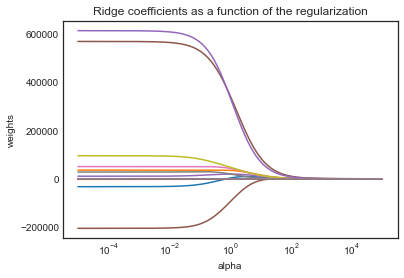

In [179]:
#you code here
ax = plt.gca()
ax.plot(alphas, coeficents)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

(3.162277660168379e-06,
 316227.7660168379,
 31138803515.808548,
 166374378762.73712)

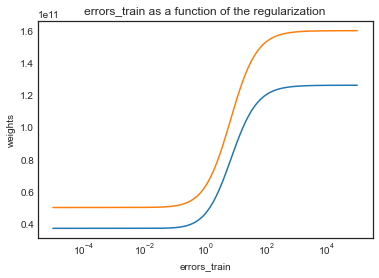

In [180]:
ax = plt.gca()
ax.plot(alphas, errors_train)
ax.plot(alphas, errors_test)
ax.set_xscale("log")
plt.xlabel("errors_train")
plt.ylabel("weights")
plt.title("errors_train as a function of the regularization")
plt.axis("tight")

In [181]:

plt.show()

**3)c) The graphs resemble the ones we talked about in class. What can you comment about these graphs? What seems to be a reasonable value for alpha?**
Reasonable value for alpha is under 100.

--> Your answer here

**3)d) Repeat a),b) and c) for Lasso(). Do you see any differences (compared to Ridge) when looking at the graphs?**

In [191]:
model_lasso = Lasso(normalize=True)
coeficents = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coeficents.append(model_lasso.coef_)
    y_true_test = y_test
    y_predict_test = model_lasso.predict(X_test)
    y_true_train = y_train
    y_predict_train = model_lasso.predict(X_train)

    errors_train.append(mean_squared_error(y_true_train, y_predict_train))
    errors_test.append(mean_squared_error(y_true_test, y_predict_test))

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing

(3.162277660168379e-06,
 316227.7660168379,
 -246687.7204949748,
 655298.7487430685)

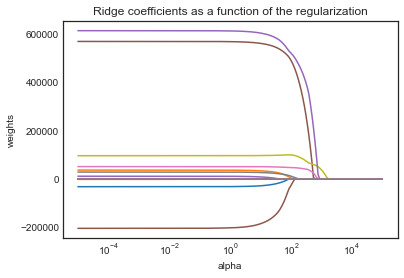

In [192]:
ax = plt.gca()
ax.plot(alphas, coeficents)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization")
plt.axis("tight")

(3.162277660168379e-06,
 316227.7660168379,
 31138427673.93782,
 166382271300.68338)

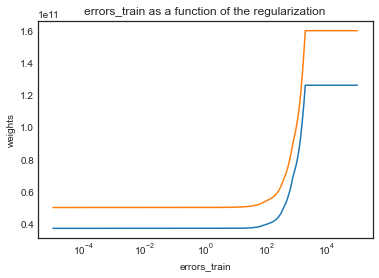

In [193]:
ax = plt.gca()
ax.plot(alphas, errors_train)
ax.plot(alphas, errors_test)
ax.set_xscale("log")
plt.xlabel("errors_train")
plt.ylabel("weights")
plt.title("errors_train as a function of the regularization")
plt.axis("tight")

In [185]:
plt.show()

--> Your answer here

**3)e) For this question use the CV version of Ridge (with a cv=10) to model your same dataset. How good is this model for your dataset?**

In [198]:
model_ridgeCV = RidgeCV(cv=10,normalize=True).fit(X_train, y_train)
coefficients = model_ridgeCV.coef_

print("Ridge - best_score: \n",model_ridgeCV.best_score_)
print("Ridge - best alpha: "+str(model_ridgeCV.alpha_))
print("Ridge - intercept: "+str(model_ridgeCV.intercept_))
print("Ridge - coefficients:\n ", coefficients)

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. T

Ridge - best_score: 
 0.7004459772349897
Ridge - best alpha: 0.1
Ridge - intercept: -8426061.550404256
Ridge - coefficients:
  [-2.34919012e+04  3.55374658e+04  7.98214368e+01  1.04220115e-01
  1.41965377e+04  5.30761365e+05  5.05829546e+04  2.92919154e+04
  8.19205267e+04  8.07349542e+01  5.85901884e+01 -2.04667337e+03
  2.86453131e+01 -3.88885547e+02  5.67473392e+05 -1.88081491e+05
  3.82861703e+01 -2.58832366e-01]


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. T

--> Your answer here

Ridge - best_score:
 0.7004459772349897
Ridge - best alpha: 0.1
Ridge - intercept: -8426061.550404256
Ridge - coefficients:

  [-2.34919012e+04  3.55374658e+04  7.98214368e+01  1.04220115e-01
  1.41965377e+04  5.30761365e+05  5.05829546e+04  2.92919154e+04
  8.19205267e+04  8.07349542e+01  5.85901884e+01 -2.04667337e+03
  2.86453131e+01 -3.88885547e+02  5.67473392e+05 -1.88081491e+05
  3.82861703e+01 -2.58832366e-01]

**3)f) Repeat e) for LassoCV(). How good is this model for your dataset? Was it better or worse than Ridge?**

In [202]:
model_lassoCV= LassoCV(cv=10, normalize=True).fit(X_train, y_train)
coefficients = model_lassoCV.coef_

print("Lasso - R-squared: "+str(model_lassoCV.score(X_train, y_train)))
print("Lasso - best alpha: "+str(model_lassoCV.alpha_))
print("Lasso - intercept: "+str(model_lassoCV.intercept_))
print("Lasso - coefficients:\n ", coefficients)

Lasso - R-squared: 0.7047661023957457
Lasso - best alpha: 1.950737512524331
Lasso - intercept: 3968293.3541247123
Lasso - coefficients:
  [-3.21772047e+04  3.53652588e+04  1.45809860e+02  9.66555183e-02
  9.96181214e+03  5.68056956e+05  5.04532963e+04  2.74083996e+04
  9.57335011e+04  3.15829992e+01  0.00000000e+00 -2.51182140e+03
  2.13515052e+01 -5.45499959e+02  6.12364290e+05 -2.01935282e+05
  1.82948743e+01 -3.11227285e-01]


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


--> Your answer here
Lasso - R-squared: 0.7047661023957457
Lasso - best alpha: 1.950737512524331
Lasso - intercept: 3968293.3541247123
Lasso - coefficients:
  [-3.21772047e+04  3.53652588e+04  1.45809860e+02  9.66555183e-02
  9.96181214e+03  5.68056956e+05  5.04532963e+04  2.74083996e+04
  9.57335011e+04  3.15829992e+01  0.00000000e+00 -2.51182140e+03
  2.13515052e+01 -5.45499959e+02  6.12364290e+05 -2.01935282e+05
  1.82948743e+01 -3.11227285e-01]

The lasso is actually a liitle bit better since the R-squared is better.

---

#### If you got to this point you will receive full marks for your Lab 2 (considering that you also attending this Lab session). Nonetheless, we recommend you keep going so that HW2 is easier for you.

---

### 4. Cross Validation

For this question we will look at K-fold cross validation and LOOCV. 

In [188]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
import time

**4)a) For this question you are going to apply cross validation to your dataset, while iterating from polynomial degree=1 up to degree=2. Look at the requirements below. How much did this operation take to compute?**

Use [KFold()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) with the following parameters:
- k of 10.
- randome_state=None
- shuffle = False

Uncomment the lines of code and fill out the missing code.

In [189]:
#lm = LinearRegression(normalize=True)
#characteristics of our CV (as listed above)
#cross_val = KFold(n_splits=10, random_state=None, shuffle=False)

#start timer
#start = time.time()
#you code here
#computation_time = (time.time()-start)
#print("Computation time: %5.3f"%computation_time)

--> Your answer here

**4)b) Repeat the steps and code from 4)a) but this time use LOOCV instead of Kfolds. How much longer did your LOOCV take compared to your k-fold cross validation?**

In [190]:
#loo_cv = LeaveOneOut()
#loo_cv.get_n_splits(housing_X_train)

#we are doing the same as before but now our splits/k = n
#start = time.time()
#loocv = KFold(n_splits=loo_cv.get_n_splits(housing_X_train), random_state=None, shuffle=False)
#your code here
#computation_time = (time.time()-start)
#print("Computation time: %5.3f"%computation_time)

--> Your answer here

---

### END OF LAB 2!